# Create an $N\times{N}$ maze using Python: 

This is a Side-Project I came across while working on an Assignment for the Artificial Intelligence Class I took at ECE, NTUA in 2021. 

It is an idea I came up with and it seems like a funny and interesting way to create an $N\times{N}$ maze using Python. 

---

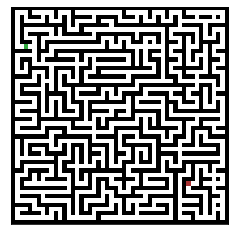


## Implementation description

- The algorithm creating the maze is implemented inside the class ```Maze```. It creates the maze based on the dimensions, the starting point S (green color) and the ending point F (red color), which are provided to the function in advance and have to be part of the maze. As shown in the comments the code ensures that there can be found at least two paths between S and F.

- The implementation is based on Prim's algorithm. Starting from S we search inside the maze for potential neighbours with +2 distance. One of them is selected randomly. We color it white (Passage) as well as the cell between this and the initial one. We work recursiveley and find the +2 neighbours of the new cell, we choose one, turn it white (Passage) as well as the cell between this and the initial one etc. 

- It is important to note that the F cell shouldn't get isolated while creating the maze. In this case it would be impossible to access it later on. Also, as a cell with specific coordinates, it shouldn't be part of a 2x2 white square. We don't really want lobbies in our maze.

- If we choose a random cell of the maze that doesn't belong to it's perimeter it is easy to see that it can be considered to be the center of a 3x3 square.

- This is why we perform consecutive checks for each four triplets of neighbours around a cell. An example of a triplet of cells is the following: Triplet example = (upper cell, diagonal up right cell, right cell)

- In case two out of three elements of this triplet get white the third must get black (obstacle) with a value of 0 so that there can't be created a white square of dimensions 2x2. We must avoid creating a chessboard-like maze around F. That's why we add a white cell to manipulate the solution ensuring there is a Passage towards F, if it is needed.

In [1]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
import  random 
import matplotlib.pyplot as plt


class Maze:
    def __init__(self, N, S, F):

      """
      N: integer that indicates the size of the NxN grid of the maze
      S: pair of integers that indicates the coordinates of the starting point (S)
      F: pair of integers that indicates the coordinates of the finish point (F)
      You can add any other parameters you want to customize maze creation (e.g. variables that
      control the creation of additional paths)
      """

      assert N > 2

      # Make sure start and end are within the grid

      assert S[0] < N-1
      assert S[1] < N-1
      assert F[0] < N-1
      assert F[1] < N-1

      assert S[0] > 0
      assert S[1] > 0
      assert F[0] > 0
      assert F[1] > 0


      self.N = N
      self.S = S
      self.F = F

      # Grid initialized with obstacles (array of 0/False)
      # 1/True indicates available cells
      self.grid = np.zeros((N, N), dtype=bool)

      #if N==4 it's a simple path
      if N==4:
        if S[0]!=F[0] and S[1]!= F[1]:
          self.grid[S[0]][F[1]]=1

      if N>4:
        #list including all cells
        path = []
        #add Start to that list
        path.append(S)

        #list including cells that can be extended
        ext_path = []
        #add Start to that list
        ext_path.append(S)

        #list including all possible frontiers 
        frontiers = []

        #start from S - check for valid frontier cells and add them to frontiers[]
        if S[0] > 0 and S[1] - 2 > 0 and S[0] < N - 1 and S[1] - 2 < N-1:
          frontiers.append((S[0], S[1] - 2))
        if S[0] > 0 and S[1] + 2 > 0 and S[0] < N - 1 and S[1] + 2 < N-1:
          frontiers.append((S[0], S[1] + 2))
        if S[0] + 2 > 0 and S[1] > 0 and S[0] + 2 < N - 1 and S[1] < N-1:
          frontiers.append((S[0] + 2, S[1]))
        if S[0] - 2 > 0 and S[1] > 0 and S[0] - 2 < N - 1 and S[1] < N-1:
          frontiers.append((S[0] - 2, S[1]))
 
        #F must not be trapped in a cell that can't be reached by the path, therefore we must make sure there is a free portal to it
        barrier = []

        #sum Upper Left
        sumUR=0

        #sum Upper Right
        sumUR=0

        #sum Down Left
        sumDL=0
        
        #sum Down Right
        sumDR=0

        while frontiers:
          #choose a random frontier cell
          B = random.choice(frontiers)
        
          #add B to both te path[] and the ext_path[]
          path.append(B)
          if B not in ext_path:
            ext_path.append(B)

          #a new frontier has been chosen. We check whether there is a +2 neighbor in ext_path and if there are more than just one we choose randomly
          #We create this list to choose towards wich path-cell the chosen frontier will be expanded to
          extend_from=[]
          if B[0] > 0 and B[1] - 2 > 0 and B[0] < N - 1 and B[1] - 2 < N-1:
            if ((B[0], B[1] - 2)) in ext_path:
              extend_from.append((B[0], B[1] - 2))

          if B[0] > 0 and B[1] + 2 > 0 and B[0] < N - 1 and B[1] + 2 < N-1:
            if ((B[0], B[1] + 2)) in ext_path:
              extend_from.append((B[0], B[1] + 2))

          if B[0] + 2 > 0 and B[1] > 0 and B[0] + 2 < N - 1 and B[1] < N-1:
            if ((B[0] + 2, B[1])) in ext_path:
              extend_from.append((B[0] + 2, B[1]))

          if B[0] - 2 > 0 and B[1] > 0 and B[0] - 2 < N - 1 and B[1] < N-1:
            if ((B[0] - 2, B[1])) in ext_path:
              extend_from.append((B[0] - 2, B[1]))
      
          #print(extend_from)
          W = random.choice(extend_from)
        
          #cell in between becomes Passage
          x=(B[0]-W[0])//2 + W[0]
          y=(B[1]-W[1])//2 + W[1]
          C=(x,y)
          if len(barrier)==0 or ((len(barrier)>0) and (C not in barrier)):
            #B must now become part of the path and therefore
            self.grid[B[0]][B[1]]=1
            #C must now become part of the path and therefore
            self.grid[x][y]=1
          else:
            #this path does not fit, we try another one and therefore we restore the data objects
            path.remove(B)
            ext_path.remove(B)
            continue

          #we add C in paths' list BUT NOT in ext_path[] as it cannot be extended
          path.append(C) 
      
          #we define new frontiers
          if B[0] > 0 and B[1] - 2 > 0 and B[0] < N - 1 and B[1] - 2 < N-1:
            if ((B[0], B[1] - 2)) not in path:
              if ((B[0], B[1] - 2)) not in frontiers:
                frontiers.append((B[0], B[1] - 2))
          if B[0] > 0 and B[1] + 2 > 0 and B[0] < N - 1 and B[1] + 2 < N-1: 
            if ((B[0], B[1] + 2)) not in path: 
              if ((B[0], B[1] + 2)) not in frontiers:
                frontiers.append((B[0], B[1] + 2))
          if B[0] + 2 > 0 and B[1] > 0 and B[0] + 2 < N - 1 and B[1] < N-1: 
            if ((B[0] + 2, B[1])) not in path: 
              if ((B[0] + 2, B[1])) not in frontiers:
                frontiers.append((B[0] + 2, B[1]))
          if B[0] - 2 > 0 and B[1] > 0 and B[0] - 2 < N - 1 and B[1] < N-1: 
            if ((B[0] - 2, B[1])) not in path:
              if ((B[0] - 2, B[1])) not in frontiers:
                frontiers.append((B[0] - 2, B[1]))
      
          #remove B from frontiers' list
          frontiers.remove(B)

          
          #now we have to make sure that the final cell F will remain accessible by S. That's why we will keep track of F's neighbor's in TRIPLETS.
          
          #sum Upper Left
          sumUL=int(self.grid[F[0]][F[1]-1])+int(self.grid[F[0]-1][F[1]-1])+int(self.grid[F[0]-1][F[1]])
          if sumUL==2:

            if ((F[0], F[1]-1)) not in path and ((F[0], F[1]-1)) not in barrier:
              #if two neighbours have been set already the third has to become a barrier
              barrier.append((F[0], F[1]-1))

            #diagonal neighbors are not considered to be expanded to F
            if ((F[0]-1, F[1]-1)) not in path and ((F[0]-1, F[1]-1)) not in barrier:
              barrier.append((F[0]-1, F[1]-1))
          
            if ((F[0]-1, F[1])) not in path and ((F[0]-1, F[1])) not in barrier:
              barrier.append((F[0]-1, F[1]))


          #sum Upper Right
          sumUR=int(self.grid[F[0]][F[1]+1])+int(self.grid[F[0]-1][F[1]+1])+int(self.grid[F[0]-1][F[1]])
          if sumUR==2:

            if ((F[0], F[1]+1)) not in path and ((F[0], F[1]+1)) not in barrier:
              barrier.append((F[0], F[1]+1))

            if ((F[0]-1, F[1]+1)) not in path and ((F[0]-1, F[1]+1)) not in barrier:
              barrier.append((F[0]-1, F[1]+1))

            if ((F[0]-1, F[1])) not in path and ((F[0]-1, F[1])) not in barrier:
              barrier.append((F[0]-1, F[1]))
            

          #sum Down Left
          sumDL=int(self.grid[F[0]][F[1]-1])+int(self.grid[F[0]+1][F[1]-1])+int(self.grid[F[0]+1][F[1]])
          if sumDL==2:

            if ((F[0], F[1]-1)) not in path and ((F[0], F[1]-1)) not in barrier:
              barrier.append((F[0], F[1]-1))
            

            if ((F[0]+1, F[1]-1)) not in path and ((F[0]+1, F[1]-1)) not in barrier:
              barrier.append((F[0]+1, F[1]-1))

            if ((F[0]+1, F[1])) not in path and ((F[0]+1, F[1]-1)) not in barrier:
              barrier.append((F[0]+1, F[1]))
            

          #sum Down Right
          sumDR=int(self.grid[F[0]][F[1]+1])+int(self.grid[F[0]+1][F[1]+1])+int(self.grid[F[0]+1][F[1]])
          if sumDR==2:

            if ((F[0], F[1]+1)) not in path and ((F[0], F[1]+1)) not in barrier:
              barrier.append((F[0], F[1]+1))
            
            if ((F[0]+1, F[1]+1)) not in path and ((F[0]+1, F[1]+1)) not in barrier:
              barrier.append((F[0]+1, F[1]+1))

            if ((F[0]+1, F[1])) not in path and ((F[0]+1, F[1])) not in barrier:
              barrier.append((F[0]+1, F[1]))
    

        #checks for diagonal neighbors of F - connect them with only one crossed neighbor
        #UL
        #a cell of this list will randomly turn into passage to F
        ULplus = []
        #no extra checks need as perimeter has values of 0 and therefore it will get into the condition
        if int(self.grid[F[0]-1][F[1]-1])==1 and sumUL==1 and sumUR<2 and sumDR<2 and sumDL<2:
          if ((F[0]-1, F[1]-1)) not in barrier:
              ULplus.append((F[0], F[1]-1))
              ULplus.append((F[0]-1, F[1]))
              Z = random.choice(ULplus)
              self.grid[Z[0]][Z[1]]=1
        #UR
        URplus = []
        if int(self.grid[F[0]-1][F[1]+1])==1 and sumUR==1 and sumUL<2 and sumDR<2 and sumDL<2:
          if ((F[0]-1, F[1]+1)) not in barrier:
              URplus.append((F[0], F[1]+1))
              URplus.append((F[0]-1, F[1]))
              Z = random.choice(URplus)
              self.grid[Z[0]][Z[1]]=1
          

        #DR
        DRplus = []
        if int(self.grid[F[0]+1][F[1]+1])==1 and sumDR==1 and sumUL<2 and sumUR<2 and sumDL<2:
          if ((F[0]+1, F[1]+1)) not in barrier:
              DRplus.append((F[0], F[1]+1))
              DRplus.append((F[0]+1, F[1]))
              Z = random.choice(DRplus)
              self.grid[Z[0]][Z[1]]=1

        #DL
        DLplus = []
        if int(self.grid[F[0]+1][F[1]-1])==1 and sumDL==1 and sumUL<2 and sumUR<2 and sumDR<2:
          if ((F[0]+1, F[1]-1)) not in barrier:
              DLplus.append((F[0], F[1]-1))
              DLplus.append((F[0]+1, F[1]-1))
              Z = random.choice(DLplus)
              self.grid[Z[0]][Z[1]]=1


      #final check for F outside of the while loop - mirrored black neighbor cells lead to mirrored white neighbor cells of F
      if int(self.grid[F[0]-1][F[1]])==0 and int(self.grid[F[0]+1][F[1]])==0:
        if F[0] > 0 and F[0] < N - 1 and F[1] - 1 > 0 and F[1] - 1 < N - 1:
          self.grid[F[0]][F[1]-1]=1
        if F[0] > 0 and F[0] < N - 1 and F[1] + 1 > 0 and F[1] + 1 < N - 1:  
          self.grid[F[0]][F[1]+1]=1

      if int(self.grid[F[0]][F[1]-1])==0 and int(self.grid[F[0]][F[1]+1])==0:
        if F[0] - 1 > 0 and F[0] - 1 < N - 1 and F[1] > 0 and F[1] < N - 1:
          self.grid[F[0]-1][F[1]]=1
        if F[0] + 1 > 0 and F[0] + 1 < N - 1 and F[1] > 0 and F[1] < N - 1:
          self.grid[F[0]+1][F[1]]=1
        
        
         

      
      #turn three (3) extra cells into passage to create at least one more path from S to F
      count = 0
      i=0
      #randomly choose coordinates 
      self.grid[S[0]][S[1]]=1
      self.grid[F[0]][F[1]]=1
      #max number of iterations to avoid infinte loop set to 100
      while i <100:
        i+=1
        x = random.randrange(1,N-1,1)
        y = random.randrange(1,N-1,1)
        if int(self.grid[x][y])==0:
          if (int(self.grid[x][y-1])==0 and int(self.grid[x][y+1])==0 and int(self.grid[x-1][y])==1 and int(self.grid[x+1][y])==1):
            self.grid[x][y]=1
            count+=1 
          if (int(self.grid[x][y-1])==1 and int(self.grid[x][y+1])==1 and int(self.grid[x-1][y])==0 and int(self.grid[x+1][y])==0):
            self.grid[x][y]=1
            count+=1
          if count==3:
            break
        else:
          continue


    def draw_map(self, path=None):
        """ Draws the maze as an image. Considers grid values of 0/False to represent obstacles and
        values of 1/True to represent empty cells, but this can be customized. Obstacles are painted
        black and empty cells are painted white. Starting point is painted green and finish point red.
        Optionally accepts as a parameter a path within the maze which is painted blue. 
        """
        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[~self.grid] = [0, 0, 0]
        image[self.grid] = [255, 255, 255]

        #color starting node S and final node F
        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]

      

        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()

        

Example for visual confirmation:

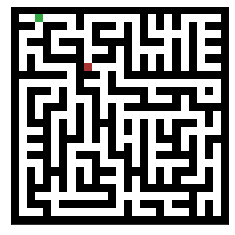

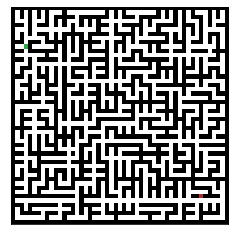

In [2]:
for N, S, F in  (27, (1, 3), (7, 9)), (51, (9, 3), (44, 44)):
    map = Maze(N, S, F)
    map.draw_map()

    

Thanks for checking out!

